![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

# 04 | Overfitting & Hyperparameter Tuning with Cross Validation

## Chapter Importance

We have already covered:

1. Regression Models
2. Classification Models
3. Train Test Split for Model Selection

In short, we have computed all possible types of models to predict numerical and categorical variables with Regression and Classification models, respectively.

Although it is not enough with computing one model, we need to compare different models to choose the one whose predictions are close to reality.

Nevertheless, we cannot evaluate the model on the same data we used to `.fit()` (train) the mathematical equation (model). We need to separate the data into train and test sets; the first to train the model, the later to evaluate the model.

No we add an extra layer of complexity because we can improve a model (an algorithm) by configuring its parameters. This chapter is all about **computing different combinations of a single model's hyperparameters** to get the best.

## [ ] Load the [Data](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)

- The goal of this dataset is
- To predict if **bank's customers** (rows) `default` next month
- Based on their **socio-demographical characteristics** (columns)

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df_credit = pd.read_excel(io=url, header=1, index_col=0)
df_credit.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
25786,200000,2,2,1,35,-2,-2,-2,-2,-2,-2,3023,3965,6843,1320,5983,1922,3965,6880,1320,5983,1922,12652,0
16502,10000,1,2,2,23,-1,0,0,0,0,-2,10078,8886,8815,9600,0,0,1300,1300,1000,0,0,0,0
20482,20000,1,2,2,26,0,0,0,2,0,0,17961,17091,14120,12266,10783,5131,1513,4932,9,286,1000,15000,0
408,500000,1,1,1,37,1,2,0,0,0,0,507062,491956,430637,376657,356636,303510,325,15296,12137,12312,14113,10526,0
19556,300000,2,2,1,28,0,0,0,-1,0,0,30631,14623,9728,28960,26589,18171,1373,1010,42348,0,0,173,0
18467,80000,2,3,1,23,-1,-1,-1,-1,-1,-1,333,333,333,333,0,75,333,333,333,0,75,0,0
19692,30000,2,2,2,33,-2,-2,-2,-2,-2,-2,498,4831,477,8560,1550,955,4831,477,8561,1550,955,570,0
22221,230000,2,1,2,28,0,0,0,0,0,0,65862,61532,37214,37680,33708,565,5000,1954,1420,3708,565,0,0
6388,250000,2,1,2,28,0,0,0,0,0,0,273927,211551,132145,88487,66701,52054,21700,11710,6030,9150,11600,48930,0


## Preprocess the Data

### Missing Data

In [2]:
df_credit.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### Dummy Variables

In [3]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

## Feature Selection

In [4]:
features = df_credit.drop(columns='default payment next month')
target = df_credit['default payment next month']

## Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.33, random_state=42)

In [7]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,,,
16832,120000,1,3,1,49,0,-1,-1,-1,-1,-1,119440,3844,2290,780,8190,4600,3844,2299,780,8190,4600,1081
4223,30000,1,1,2,38,2,0,0,0,0,0,69707,71904,62630,57406,46231,73262,4000,5000,8000,1460,40000,10000
8737,90000,2,2,2,39,0,0,0,0,0,0,45709,45045,42151,37842,30849,28061,2000,2000,1200,1018,1200,710
27881,130000,2,3,1,26,0,0,2,2,2,0,121329,128791,127881,133130,127159,131069,11000,2600,9000,0,6000,5000
29291,50000,1,3,2,26,2,0,0,0,0,0,49644,94883,42097,32394,16658,17006,2047,5728,1300,1194,617,650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29803,50000,1,2,2,32,0,0,0,0,0,0,52475,53600,55739,55957,29238,6119,2000,3000,1591,72,1134,73421
5391,200000,1,1,2,37,2,2,2,2,2,2,157131,166590,168386,164182,169029,172084,13500,6000,0,7500,6000,4000
861,50000,1,1,2,26,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
X_test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,,,
2309,30000,1,2,2,25,0,0,0,0,0,0,8864,10062,11581,12580,13716,14828,1500,2000,1500,1500,1500,2000
22405,150000,2,1,2,26,0,0,0,0,0,0,136736,125651,116684,101581,77741,77264,4486,4235,3161,2647,2669,2669
23398,70000,2,3,1,32,0,0,0,0,0,0,70122,69080,68530,69753,70111,70212,2431,3112,3000,2438,2500,2554
25059,130000,1,3,2,49,0,0,0,0,0,-1,20678,18956,16172,16898,11236,6944,1610,1808,7014,27,7011,4408
2665,50000,2,2,2,36,0,0,0,0,0,2,94228,47635,42361,19574,20295,19439,2000,1500,1000,1800,0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,100000,2,1,2,26,-1,-1,-2,-2,-2,-2,26273,-73,-73,-73,-73,-73,0,0,0,0,0,0
9813,110000,1,2,1,32,0,0,0,0,0,2,110198,107710,83913,47369,48905,46046,3851,3021,1649,3513,0,1664
19632,170000,2,1,1,41,0,0,0,0,0,0,93095,95044,98505,99970,102303,104654,3500,5000,4000,4000,4000,4000


## [ ] `DecisionTreeClassifier()` with Default Hyperparameters

In [9]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

In [10]:
model_dt.fit(X=X_train , y=y_train)

DecisionTreeClassifier()

### Accuracy

#### In `train` data

In [11]:
model_dt.score(X=X_train,y=y_train)

0.9995024875621891

#### In `test` data

In [12]:
model_dt.score(X=X_test,y=y_test)

0.7288888888888889

### Model Visualization

In [13]:
from sklearn.tree import plot_tree

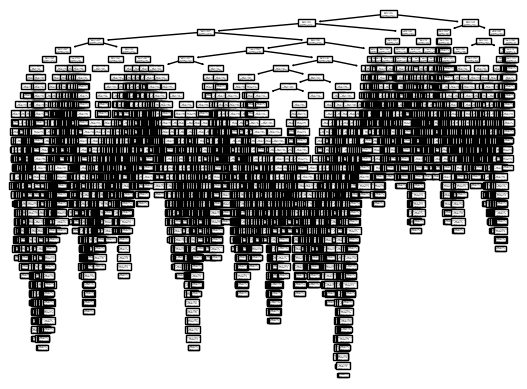

In [14]:
plot_tree(decision_tree=model_dt);

## `DecisionTreeClassifier()` with Custom Hyperparameters

### 1st Configuration

In [15]:
model_dt=DecisionTreeClassifier(max_depth=3)

In [16]:
model_dt.fit(X=X_train , y=y_train)

DecisionTreeClassifier(max_depth=3)

#### Accuracy

##### In `train` data

In [17]:
model_dt.score(X=X_train,y=y_train)

0.8207960199004976

##### In `test` data

In [18]:
model_dt.score(X=X_test,y=y_test)

0.8222222222222222

#### Model Visualization

In [19]:
features.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

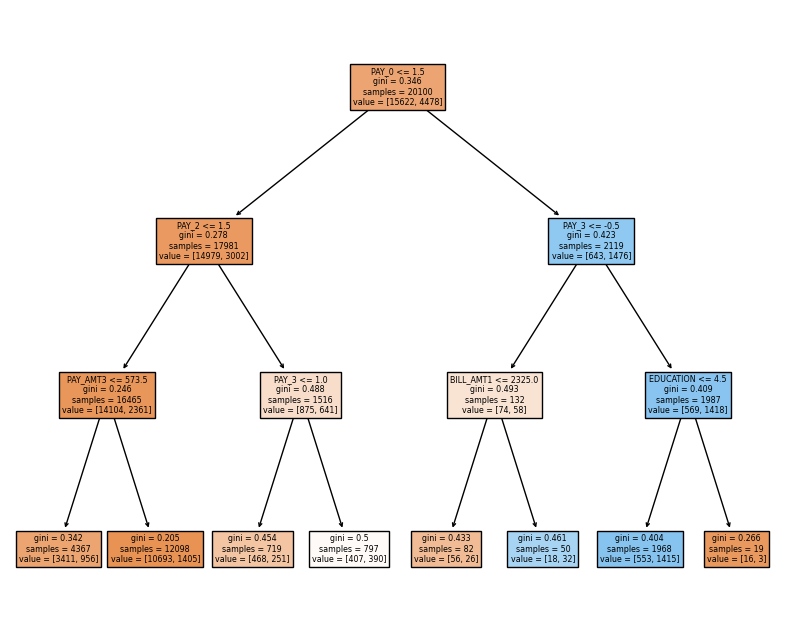

In [20]:
import matplotlib.pyplot as plot

plot.figure(figsize=(10,8))
plot_tree(decision_tree=model_dt,feature_names=features.columns,filled=True);


![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F4756451%2F5724f9841b58cbd7838a851ac6df659b%2Frpqa6.jpg?generation=1608831884903054&alt=media)

### [ ] 2nd Configuration

In [21]:
model_dt = DecisionTreeClassifier(splitter='random',max_features=0.03,max_depth = 5,)
model_dt.fit(X=X_train,y=y_train)

DecisionTreeClassifier(max_depth=5, max_features=0.03, splitter='random')

#### Accuracy

##### In `train` data

In [22]:
model_dt.score(X=X_train,y=y_train)

0.7776616915422886

##### In `test` data

In [23]:
model_dt.score(X=X_test,y=y_test)

0.7826262626262627

#### Model Visualization

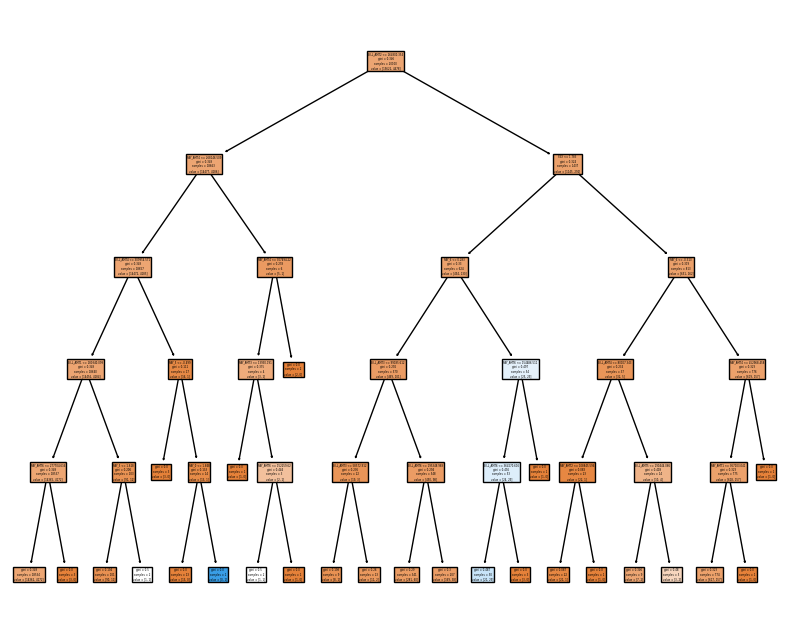

In [24]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plot_tree(decision_tree=model_dt,feature_names=features.columns,filled=True);

### 3rd Configuration

In [25]:
model_dt = DecisionTreeClassifier(criterion='entropy',splitter='random',max_features=0.03)
model_dt.fit(X=X_train,y=y_train)

DecisionTreeClassifier(criterion='entropy', max_features=0.03,
                       splitter='random')

## TRAIN DATA

In [26]:
model_dt.score(X=X_train,y=y_train)

0.9995024875621891

## TEST DATA

In [27]:
model_dt.score(X=X_test,y=y_test)

0.7121212121212122

### 4th Configuration

### 5th Configuration

## [ ] `GridSearchCV()` to find Best Hyperparameters

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
model_dt=DecisionTreeClassifier()

In [30]:
param_grid={'max_depth':[None,3,5 ,7,9],
           'min_samples_leaf':[1,300,500,2300],
           'criterion':['log_loss','gini']}

In [31]:
cv_dt = GridSearchCV(estimator=model_dt,param_grid=param_grid)

In [32]:
cv_dt.fit(X=X_train,y=y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['log_loss', 'gini'],
                         'max_depth': [None, 3, 5, 7, 9],
                         'min_samples_leaf': [1, 300, 500, 2300]})

In [33]:
cv_dt.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=5)

In [34]:
pd.DataFrame(cv_dt.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.341873,0.008778,0.002619,0.000058,log_loss,None,1,"{'criterion': 'log_loss', 'max_depth': None, '...",0.732090,0.734577,0.737811,0.731095,0.733831,0.733881,0.002320,39
1,0.137886,0.004880,0.002212,0.000471,log_loss,None,300,"{'criterion': 'log_loss', 'max_depth': None, '...",0.824129,0.818159,0.822139,0.813930,0.815423,0.818756,0.003875,5
2,0.124010,0.009159,0.002038,0.000054,log_loss,None,500,"{'criterion': 'log_loss', 'max_depth': None, '...",0.824876,0.815672,0.821144,0.816418,0.815174,0.818657,0.003766,13
3,0.049840,0.001717,0.001994,0.000104,log_loss,None,2300,"{'criterion': 'log_loss', 'max_depth': None, '...",0.783831,0.786318,0.784577,0.775373,0.770149,0.780050,0.006229,29
4,0.062687,0.000170,0.001911,0.000013,log_loss,3,1,"{'criterion': 'log_loss', 'max_depth': 3, 'min...",0.826119,0.816915,0.821393,0.814925,0.815672,0.819005,0.004206,4
5,0.061687,0.001961,0.001950,0.000104,log_loss,3,300,"{'criterion': 'log_loss', 'max_depth': 3, 'min...",0.824876,0.815672,0.821144,0.813930,0.815174,0.818159,0.004171,23
6,0.058703,0.000732,0.001894,0.000015,log_loss,3,500,"{'criterion': 'log_loss', 'max_depth': 3, 'min...",0.824876,0.815672,0.821144,0.816418,0.815174,0.818657,0.003766,13
7,0.045058,0.001359,0.001884,0.000026,log_loss,3,2300,"{'criterion': 'log_loss', 'max_depth': 3, 'min...",0.783831,0.786318,0.784577,0.775373,0.770149,0.780050,0.006229,29
8,0.101756,0.000546,0.001926,0.000059,log_loss,5,1,"{'criterion': 'log_loss', 'max_depth': 5, 'min...",0.827363,0.818159,0.822886,0.814428,0.814428,0.819453,0.005031,1
9,0.091876,0.000642,0.001948,0.000079,log_loss,5,300,"{'criterion': 'log_loss', 'max_depth': 5, 'min...",0.824129,0.818159,0.822139,0.813930,0.815423,0.818756,0.003875,5


<img src="src/grid_search_cross_validation.png" style="margin-top: 100px"/>

## [ ] Other Models

Now let's try to find the best hyperparameter configuration of other models, which don't have the same hyperparameters than the Decision Tree because their algorithm and mathematical equation are different.

### Support Vector Machines `SVC()`

In [88]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_norm = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

In [39]:
X_norm_train, X_norm_test, y_train, y_test = train_test_split(X_norm, target, test_size=0.33, random_state=42)

In [49]:
from sklearn.svm import SVC
model_sv= SVC()

In [50]:
model_sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [53]:
param_grid={'C': [0.1, 1, 10],
    'kernel': ['linear', 'kernel']}

In [57]:
cv_sv = GridSearchCV(estimator=model_sv,param_grid=param_grid)

In [59]:
cv_sv.fit(X_norm_test,y_test)

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Applications/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    ) = libsv

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'kernel']})

In [60]:
cv_sv.best_estimator_

SVC(C=10, kernel='linear')

### K Nearest Neighbors`KNeighborsClassifier()`

In [62]:
from sklearn.neighbors import KNeighborsClassifier
model_kn = KNeighborsClassifier()

In [63]:
model_kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [64]:
param_grid = {'leaf_size': [10, 20, 30, 50],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'n_neighbors': [3, 5, 10, 20]
             }

In [66]:
kn_sv=GridSearchCV(estimator=model_kn,param_grid=param_grid)

In [69]:
kn_sv.fit(X_norm_test,y_test)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30, 50],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 10, 20]})

In [70]:
kn_sv.best_estimator_

KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=20)

### What the heck is returning the function?

In [72]:
result = {'model':
          [kn_sv.best_estimator_,
          cv_sv.best_estimator_,
          cv_dt.best_estimator_],
          'score':
         [ cv_dt.score(X_test,y_test),
          cv_sv.score(X_norm_test,y_test),
          kn_sv.score(X_norm_test,y_test)]
          
          
         }

In [74]:
pd.DataFrame(result).style.background_gradient()

,model,score
0,"KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=20)",0.818990
1,"SVC(C=10, kernel='linear')",0.796768
2,"DecisionTreeClassifier(criterion='log_loss', max_depth=5)",0.816263


## [ ] Best Model with Best Hyperparameters

KNeighborsClassifier has the best hyperparameters.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.